In [1]:
import json 
import spacy
import scispacy
from scispacy.linking import EntityLinker
import pubmed_parser as pp
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_sci_scibert")
nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "umls"})
# nlp.enable_pipe("tagger")
# nlp.enable_pipe("ner")
# nlp.enable_pipe("transformer")
# nlp.enable_pipe("attribute_ruler")
# nlp.enable_pipe("parser")
# nlp.enable_pipe("lemmatizer")
# 'transformer', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner',
# nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "mesh"})
# linker = nlp.get_pipe("scispacy_linker")

deselect_stop_words = ['no', 'not']
for w in deselect_stop_words:
    nlp.vocab[w].is_stop = False

dicts_out = pp.parse_medline_xml('../data/pubmed_data/processed_data/processed_full_data.xml',
                                 year_info_only=False,
                                 nlm_category=False,
                                 author_list=False,
                                 reference_list=False)

/home/rgoli/.local/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/rgoli/.local/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
len(dicts_out)

3326

In [2]:
dicts_out[0]['abstract']

"Beaulieu-Jones and coworkers propose a litmus test for the field of predictive analytics-performance improvements must be demonstrated to be the result of non-clinician-initiated data, otherwise, there should be caution in assuming that predictive models could improve clinical decision-making (Beaulieu-Joneset al2021). They demonstrate substantial prognostic information in unsorted physician orders made before the first midnight of hospital admission, and we are persuaded that it is fair to ask-if the physician thought of it first, what exactly is machine learning for in-patient risk stratification learning about? While we want predictive analytics to represent the leading indicators of a patient's illness, does it instead merely reflect the lagging indicators of clinicians' actions? We propose that continuous cardiorespiratory monitoring-'routine telemetry data,' in Beaulieu-Jones' terms-represents the most valuable non-clinician-initiated predictive signal present in patient data, a

In [3]:
comb_arr=[]
pmid_arr =[]
for paper in dicts_out:
    comb_arr.append(paper['title']+' '+paper['abstract'])
    pmid_arr.append(paper['pmid'])

In [4]:
from tqdm import tqdm

abs_sent_len_arr = []
abs_words_len_arr = []
sent_words_len_arr = []
outlier_abs_with_sent_len = []
abs_sent_len_4_5 = []
greater_sent = []
with tqdm(nlp.pipe(comb_arr),total=3326) as pbar:
    i=0
    for doc in pbar:
        sents = [str(x) for x in doc.sents]
        #[token.orth_ for token in sent.root.text if not token.is_punct | token.is_space | token.is_stop]
        # swlqr = [[token.orth_ for token in sent if not token.is_punct | token.is_space | token.is_stop] for sent in doc.sents]
        # print(swlqr)
        sent_words_len_arr.extend([len([token.orth_ for token in sent if not token.is_punct | token.is_space | token.is_stop]) for sent in doc.sents])
        abs_sent_len_arr.append(len(sents))
        if len(sents)<3:
            outlier_abs_with_sent_len.append(i)
        else:
            greater_sent.append(pmid_arr[i])
        if 4<=len(sents)<=5:
            abs_sent_len_4_5.append(i)
            # print(i,pmid_arr[i])
        text = [token.orth_ for token in doc if not token.is_punct | token.is_space | token.is_stop]
        # print(doc.text)
        # print(sents)
        # print(text)
        abs_words_len_arr.append(len(text))
        pbar.set_description("The %s document is processed" % (i + 1))
        i+=1

  0%|          | 0/3326 [00:00<?, ?it/s]/home/rgoli/.conda/envs/pytorch/lib/python3.8/site-packages/scispacy/candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
/home/rgoli/.conda/envs/pytorch/lib/python3.8/site-packages/scispacy/candidate_generation.py:285: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
The 3326 document is processed: 100%|██████████| 3326/3326 [06:47<00:00,

In [6]:
with open('CDSS_PMIDs_SentTrim','w') as f:
    for x in greater_sent:
        f.write(x+"\n")

In [8]:
print("Avg. sentence per abstract: {}".format(sum(abs_sent_len_arr)//len(abs_sent_len_arr)))
print("Avg. words per abstract: {}".format(sum(abs_words_len_arr)//len(abs_words_len_arr)))
print("Avg. words per sentence: {}".format(sum(sent_words_len_arr)//len(sent_words_len_arr)))

Avg. sentence per abstract: 10
Avg. words per abstract: 140
Avg. words per sentence: 13


In [9]:
print("Senteces/Abstract ::: Min={}  Max={}".format(min(abs_sent_len_arr),max(abs_sent_len_arr)))
print("Words/Abstract ::: Min={}  Max={}".format(min(abs_words_len_arr),max(abs_words_len_arr)))
print("Words/Sentence ::: Min={}  Max={}".format(min(sent_words_len_arr),max(sent_words_len_arr)))

Senteces/Abstract ::: Min=1  Max=52
Words/Abstract ::: Min=3  Max=711
Words/Sentence ::: Min=0  Max=105


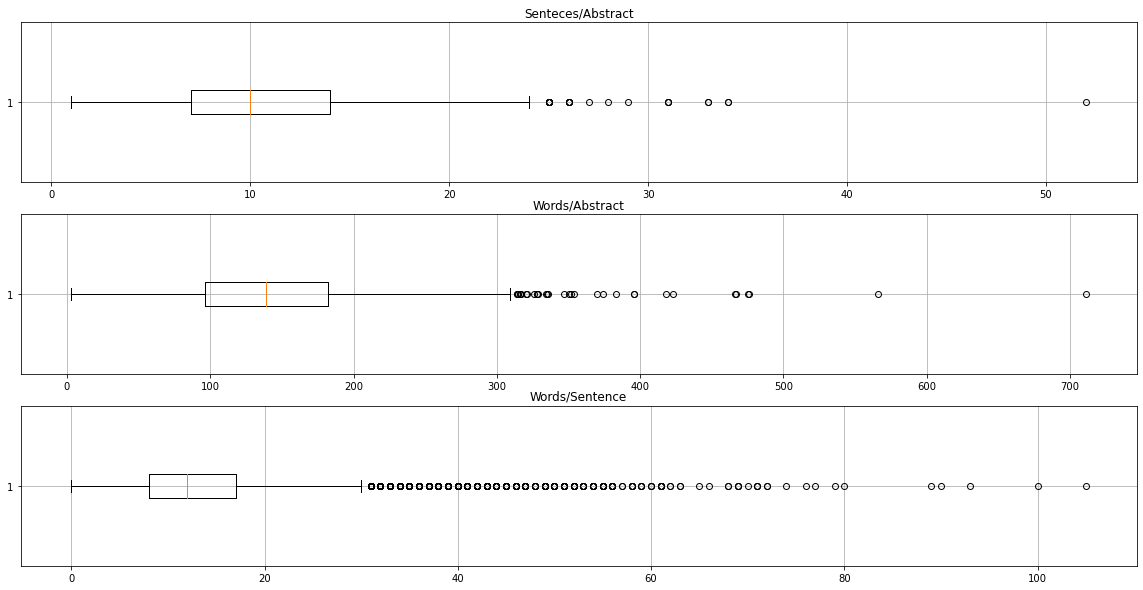

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1,figsize=(20,10))

ax[0].set_title("Senteces/Abstract")
ax[0].boxplot(abs_sent_len_arr,vert=False)
ax[0].grid(True, which='both')

ax[1].set_title("Words/Abstract")
ax[1].boxplot(abs_words_len_arr,vert=False)
ax[1].grid(True, which='both')

ax[2].set_title("Words/Sentence")
ax[2].boxplot(sent_words_len_arr,vert=False)
ax[2].grid(True, which='both')

plt.show()

In [11]:
import numpy as np

print("Median sentence per abstract: {}".format(np.median(abs_sent_len_arr)))
print("Median words per abstract: {}".format(np.median(abs_words_len_arr)))
print("Median words per sentence: {}".format(np.median(sent_words_len_arr)))

Median sentence per abstract: 10.0
Median words per abstract: 139.0
Median words per sentence: 12.0


In [13]:
for x in outlier_abs_with_sent_len:
    print("PMID: ", pmid_arr[x])
    print(comb_arr[x])

PMID:  33847000
Electronic alerts for early detection of acute kidney injury: considering their implementation in Australian hospitals. 
PMID:  32586609
Management of acute myocardial injury in patients with confirmed or suspected COVID-19. 
PMID:  32016531
Clinical management of sepsis can be improved by artificial intelligence: no. 
PMID:  31834423
Clinical management of sepsis can be improved by artificial intelligence: yes. 
PMID:  31677654
Anesthesia Informatics in 2018. 
PMID:  31639740
Biomarkers and Molecular Diagnostics for Early Detection and Targeted Management of Sepsis and Septic Shock in the Emergency Department. 
PMID:  31619073
Chronic disease management: Discussing the perspectives of general practitioners in Italy. 
PMID:  31415287
Pharmacist-Psychiatrist Interventions Triggered by Clinical Decision Support System Improve Monitoring of Patients Using Lithium in a General Hospital. 
PMID:  31023866
Electronic clinical decision support system (eCDSS) in the management o

In [18]:
print("PMIDs with No/Little Abstract Information:\n")
for x in outlier_abs_with_sent_len:
    print(pmid_arr[x], end=",")

PMIDs with No/Little Abstract Information:

33847000,32586609,32016531,31834423,31677654,31639740,31619073,31415287,31023866,30927472,30361207,30215540,29749424,29584731,29431386,28743777,28738983,27378540,27332393,27021287,27001984,26756103,26615117,26340249,26340243,26213298,25991138,25795642,25725294,25265669,24865755,24491272,24423993,24199435,24199432,23920783,23855147,23844443,23509850,23339265,22099568,21485252,21381452,20508669,20501531,20407194,20407172,20407167,20407166,19875424,19748739,19353974,19181195,19162835,18582726,18323264,17885637,17494351,17468151,17432368,17249397,17238552,17160538,17110652,16904569,16850545,16751047,16675654,16266025,16134538,16075479,15922847,15910585,15338527,15283511,15154321,15127488,14971076,14872465,14728406,14727400,14679730,12698905,12564140,12453562,12365298,12122798,12026120,11840053,11813526,11719755,11351232,11255624,11207950,10622868,10609477,10557772,10538678,10538082,10345771,10187355,10185146,10181184,9611842,10181747,10180266,101

In [16]:
("Total Documents without No/Little Abstract Information:",len(outlier_abs_with_sent_len))

('Total Documents without No/Little Abstract Information:', 111)

In [21]:
print("Total Documents with 4-5 Sentences in Abstract:",len(abs_sent_len_4_5))
print("PMIDs with 4-5 Sentences in Abstract:\n")
for x in abs_sent_len_4_5:
    print(pmid_arr[x], end=",")



Total Documents with 4-5 Sentences in Abstract: 270
PMIDs with 4-5 Sentences in Abstract:

34580243,33447854,32723853,32687152,32591104,32570513,32479177,32157259,31946150,31836327,31438332,31438307,31438300,31438055,31438003,30854436,30815104,30768429,30579672,30470687,30399617,30344618,30339893,30242817,30205730,30195845,30154183,29968669,29885121,29857460,29724445,29295464,29295417,28941535,28927681,28921727,28679926,28495043,28423861,28423852,28269917,28269846,28086985,27959579,27908334,27879369,27762202,27762192,27741994,27574325,27342444,27225572,27220195,27194173,27023676,27017041,26785109,26739873,26637722,26352903,26293850,26262410,26262353,26262327,26262259,26262249,26262058,26249200,26153015,25999073,25991268,25857515,25821512,26958306,26958298,25160229,25160150,25160137,25160134,25155030,25006138,24943549,24732516,24529409,24469569,24209941,24147323,24109935,23920829,23920613,23920583,23851288,23746723,23542959,23388270,23366361,23366354,23366138,23189531,23151728,23027477,